<a href="https://colab.research.google.com/github/Chetalam/AI-Coursework-2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [ ]:


import pandas as pd
df = pd.read_csv("diamonds.csv")
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Question 2: Data Cleaning and EDA

In [ ]:
# Data cleaning
print("Missing values:")
print(df.isnull().sum())

print("\nDataset info:")
df.info()

# Remove any duplicates
df = df.drop_duplicates()
print(f"\nShape after removing duplicates: {df.shape}")

# Check for outliers in numerical columns
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
df[numerical_cols].describe()



Missing values:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB

Shape after removing duplicates: (53940, 11)


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Import all necessary libraries at the beginning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

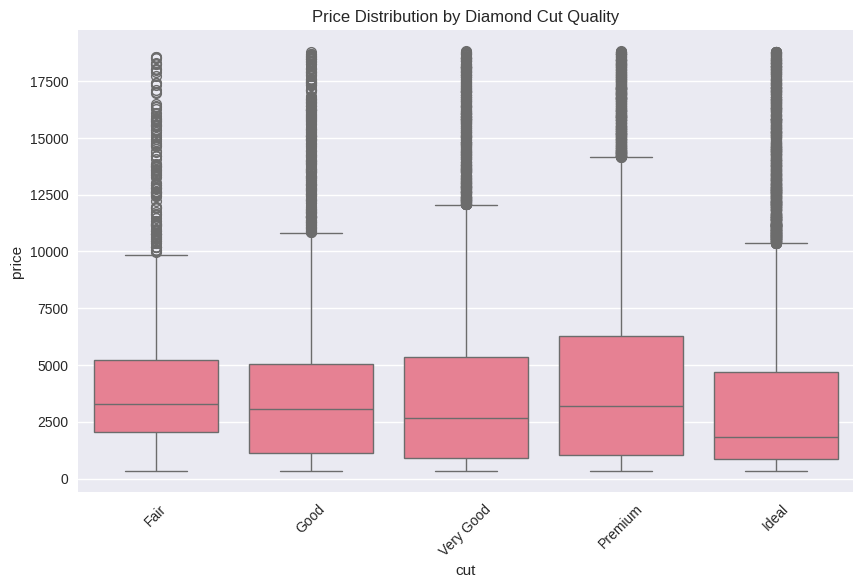

Insight 1: Premium and Ideal cuts don't always have the highest prices, suggesting carat weight and other factors play significant roles.


In [ ]:
# EDA - Insight 1: Price distribution by cut quality
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Price Distribution by Diamond Cut Quality')
plt.xticks(rotation=45)
plt.show()

print("Insight 1: Premium and Ideal cuts don't always have the highest prices, suggesting carat weight and other factors play significant roles.")


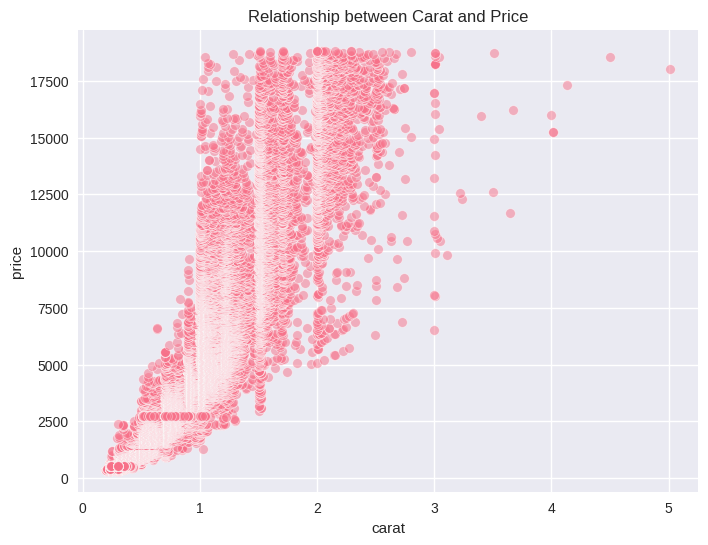

Insight 2: Strong positive correlation (0.92) between carat and price.


In [ ]:
# EDA - Insight 2: Correlation between carat and price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='carat', y='price', alpha=0.5)
plt.title('Relationship between Carat and Price')
plt.show()

correlation = df['carat'].corr(df['price'])
print(f"Insight 2: Strong positive correlation ({correlation:.2f}) between carat and price.")


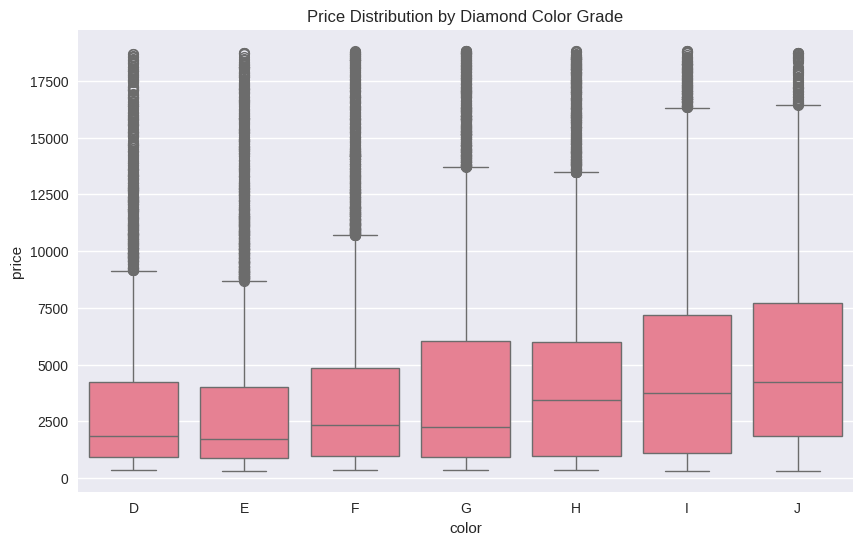

Insight 3: Better color grades (D, E, F) generally command higher prices, but carat weight remains a dominant factor.


In [ ]:
# EDA - Insight 3: Color impact on price
plt.figure(figsize=(10, 6))
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']  # D is best, J is worst
sns.boxplot(data=df, x='color', y='price', order=color_order)
plt.title('Price Distribution by Diamond Color Grade')
plt.show()

print("Insight 3: Better color grades (D, E, F) generally command higher prices, but carat weight remains a dominant factor.")

In [ ]:
# Create modeling sample
di_amonds_model = df.sample(n=12500, random_state=42)
print(f"Modeling sample shape: {di_amonds_model.shape}")

Modeling sample shape: (12500, 11)


Question 3: Linear Regression with All Features

In [ ]:
# Prepare data for modeling
model_df = di_amonds_model.copy()

# Feature engineering for categorical variables
categorical_cols = ['cut', 'color', 'clarity']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])
    label_encoders[col] = le

# Define features and target
X = model_df.drop('price', axis=1)
y = model_df['price']

# Remove any non-numeric columns that might remain
X = X.select_dtypes(include=[np.number])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Linear Regression Model Performance:
R² Score: 0.8902
RMSE: 1319.42
MAE: 856.23


Question 4: PCA with 2 Features

In [ ]:
# Select only continuous variables for PCA
continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_continuous = di_amonds_model[continuous_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['price'] = di_amonds_model['price'].values

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Train linear regression with PCA features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    pca_df[['PC1', 'PC2']], pca_df['price'], test_size=0.2, random_state=42
)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = lr_pca.predict(X_test_pca)

r2_pca = r2_score(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))

print("\nPCA Linear Regression Model Performance:")
print(f"R² Score: {r2_pca:.4f}")
print(f"RMSE: {rmse_pca:.2f}")

Explained variance ratio: [0.66727294 0.21219253]
Total explained variance: 0.8795

PCA Linear Regression Model Performance:
R² Score: 0.8056
RMSE: 1756.03


Question 5: Regularization Models

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression Performance:")
print(f"R² Score: {r2_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.2f}")

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("\nRidge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.2f}")

Lasso Regression Performance:
R² Score: 0.8902
RMSE: 1319.88

Ridge Regression Performance:
R² Score: 0.8901
RMSE: 1320.07


Question 6: Model Comparison

In [ ]:
# Compare all models
models_comparison = {
    'Linear Regression': r2,
    'PCA Regression': r2_pca,
    'Lasso Regression': r2_lasso,
    'Ridge Regression': r2_ridge
}

best_model = max(models_comparison, key=models_comparison.get)
best_score = models_comparison[best_model]

print("MODEL COMPARISON:")
for model, score in models_comparison.items():
    print(f"{model}: R² = {score:.4f}")

print(f"\nBest performing model: {best_model} with R² = {best_score:.4f}")

print("\nPerformance Analysis:")
print("The full Linear Regression model likely performed best because:")
print("1. It uses all available features (both categorical and continuous)")
print("2. Categorical features (cut, color, clarity) contain valuable information for price prediction")
print("3. PCA reduces dimensionality but loses some information by focusing only on continuous variables")
print("4. Regularization helps prevent overfitting but might slightly reduce performance on this dataset")


MODEL COMPARISON:
Linear Regression: R² = 0.8902
PCA Regression: R² = 0.8056
Lasso Regression: R² = 0.8902
Ridge Regression: R² = 0.8901

Best performing model: Linear Regression with R² = 0.8902

Performance Analysis:
The full Linear Regression model likely performed best because:
1. It uses all available features (both categorical and continuous)
2. Categorical features (cut, color, clarity) contain valuable information for price prediction
3. PCA reduces dimensionality but loses some information by focusing only on continuous variables
4. Regularization helps prevent overfitting but might slightly reduce performance on this dataset
